How do banks know whether or not to approve you for a credit card based on just some information about you? Thanks to Machine Learning (ML), many banks were able to create their own model of predicting how reliable an applicant is. for this project, I will apply different Classification ML models into the data and pick out which model perform the best (the highest accuracy).

# Importing libraries and data

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
df = pd.read_csv("clean_dataset.csv")

# Data Overview

In [ ]:
df.head()


In [ ]:
print(df.columns)


In [ ]:
cols = ['Industry', 'Ethnicity', 'Citizen']

for col in cols:
    print(f'--- {col} ---')
    print(df[col].unique())
    print('\n')

In [ ]:
print(f'Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}')

In [ ]:
print(f'Number of null values: {df.isnull().values.sum()}')
print(f'Number of duplicated values: {df.duplicated().values.sum()}')

# Data Visualization

In [ ]:
# setting graphing format

plt.rcParams['figure.figsize'] = (10, 8)
font_fmt = {'fontweight': 'bold',
           'fontsize': 20}

In [ ]:
df.head()


In [ ]:
numeric_cols = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
boolean_cols = ['Gender', 'Married', 'BankCustomer', 'PriorDefault', 'Employed', 'DriversLicense', 'Approved']
string_cols = ['Industry', 'Ethnicity', 'Citizen']

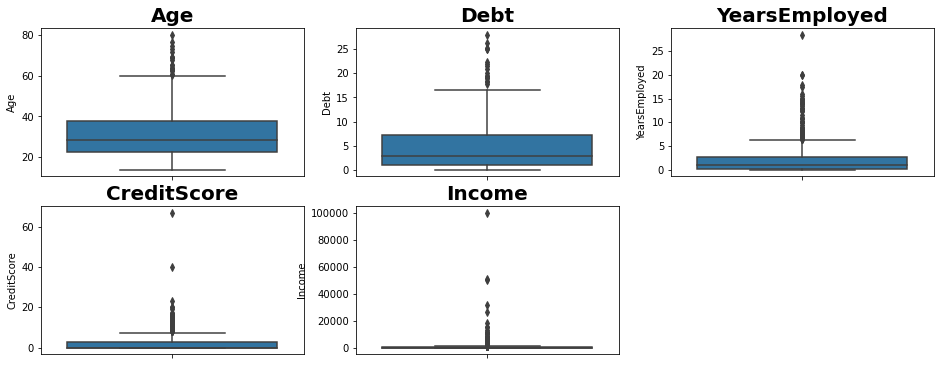

In [55]:
plt.figure(figsize=(16,6))

for i, plot in enumerate(numeric_cols):
    plt.subplot(int(f'23{i+1}'))
    plt.title(f'{plot}', fontdict=font_fmt)
    plt.subplots_adjust(hspace=0.2)
    sns.boxplot(data=df, y=plot)

In [56]:
for col in numeric_cols:
    print(f'--- {col} ---')
    print(df[col].describe())
    print('\n')

--- Age ---
count    690.000000
mean      31.514116
std       11.860245
min       13.750000
25%       22.670000
50%       28.460000
75%       37.707500
max       80.250000
Name: Age, dtype: float64


--- Debt ---
count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: Debt, dtype: float64


--- YearsEmployed ---
count    690.000000
mean       2.223406
std        3.346513
min        0.000000
25%        0.165000
50%        1.000000
75%        2.625000
max       28.500000
Name: YearsEmployed, dtype: float64


--- CreditScore ---
count    690.00000
mean       2.40000
std        4.86294
min        0.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       67.00000
Name: CreditScore, dtype: float64


--- Income ---
count       690.000000
mean       1017.385507
std        5210.102598
min           0.000000
25%           0.000000
50%           5.000000
75%         395.5

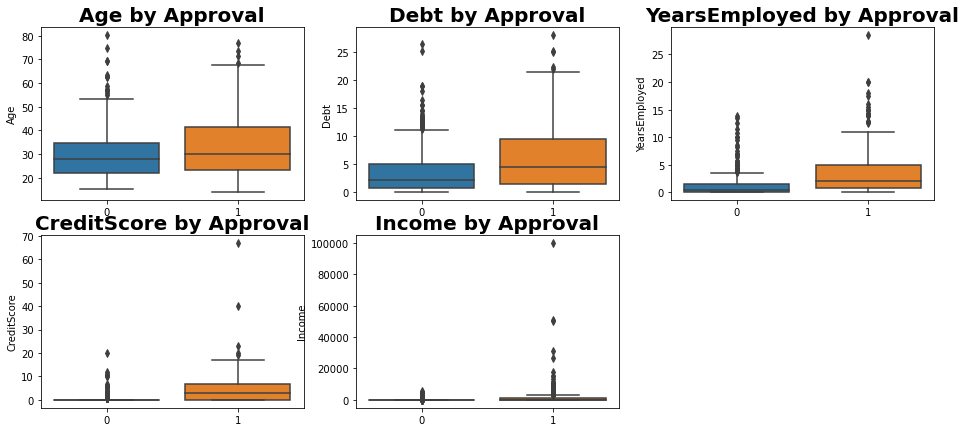

In [58]:
plt.figure(figsize=(16, 7))

for i, plot in enumerate(numeric_cols):
    plt.subplot(int(f'23{i+1}'))
    plt.title(f'{plot} by Approval', fontdict=font_fmt)
    plt.subplots_adjust(hspace=0.2)
    sns.boxplot(data=df, y=plot, x='Approved')
    plt.xlabel('')


plt.show()

In [59]:
for col in numeric_cols:
    for a in range(2):
        if a == 0:
            print(f'--- {col} (Not Approved) ---')
        else:
            print(f'--- {col} (Approved) ---')
        print(df[col][df['Approved']==a].describe())
        print('\n')

--- Age (Not Approved) ---
count    383.000000
mean      29.773029
std       10.777571
min       15.170000
25%       22.125000
50%       27.670000
75%       34.790000
max       80.250000
Name: Age, dtype: float64


--- Age (Approved) ---
count    307.000000
mean      33.686221
std       12.774745
min       13.750000
25%       23.210000
50%       30.170000
75%       41.330000
max       76.750000
Name: Age, dtype: float64


--- Debt (Not Approved) ---
count    383.000000
mean       3.839948
std        4.337662
min        0.000000
25%        0.835000
50%        2.210000
75%        5.000000
max       26.335000
Name: Debt, dtype: float64


--- Debt (Approved) ---
count    307.000000
mean       5.904951
std        5.471485
min        0.000000
25%        1.500000
50%        4.460000
75%        9.520000
max       28.000000
Name: Debt, dtype: float64


--- YearsEmployed (Not Approved) ---
count    383.000000
mean       1.257924
std        2.120481
min        0.000000
25%        0.125000
50%    

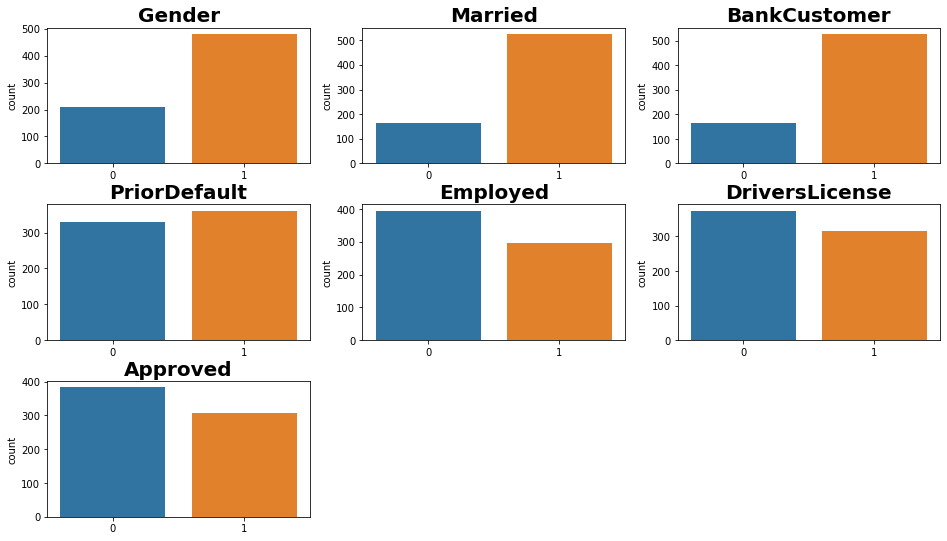

In [63]:
plt.figure(figsize=(16, 9))

for i, plot in enumerate(boolean_cols):
    plt.subplot(int(f'33{i+1}'))
    plt.title(plot, fontdict=font_fmt)
    plt.subplots_adjust(hspace=0.3)
    sns.countplot(x=df[plot])
    plt.xlabel('')

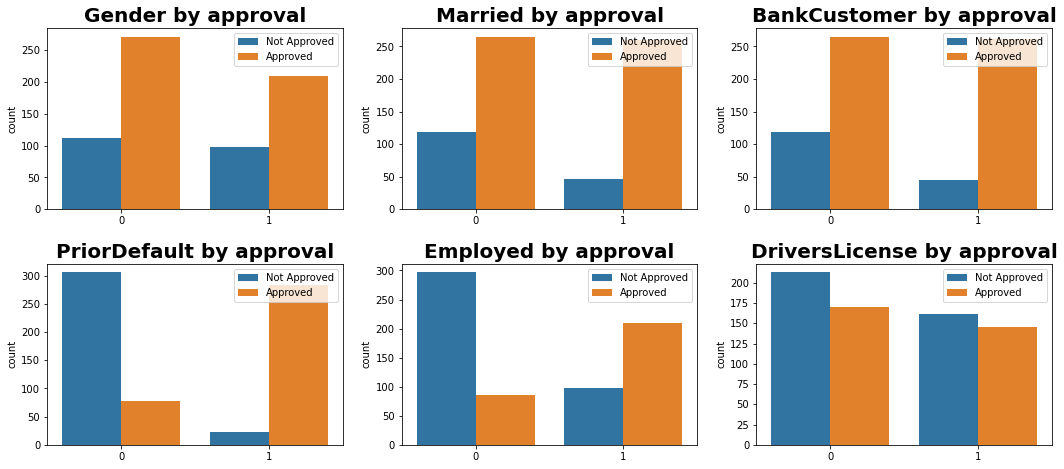

In [64]:
plt.figure(figsize=(18, 12))

for i, plot in enumerate(boolean_cols):
    if plot != 'Approved':
        plt.subplot(int(f'33{i+1}'))
        plt.title(f'{plot} by approval', fontdict=font_fmt)
        plt.subplots_adjust(hspace=0.3)
        sns.countplot(data=df, x='Approved', hue=plot)
        plt.xlabel('')
        plt.legend(['Not Approved', 'Approved'], loc='upper right')

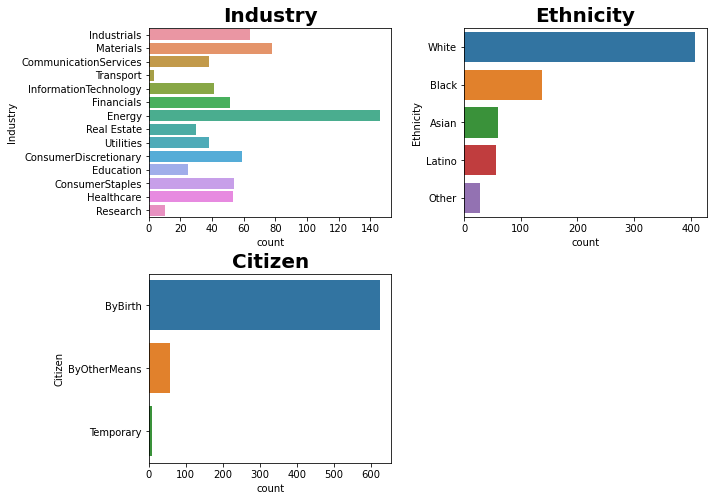

In [65]:
for i, plot in enumerate(string_cols):
    if plot != 'ZipCode':
        plt.subplot(int(f'22{i+1}'))
        plt.title(f'{plot}', fontdict=font_fmt)
        plt.subplots_adjust(wspace=0.3, hspace=0.3)
        sns.countplot(y=df[plot])


<Figure size 576x576 with 0 Axes>

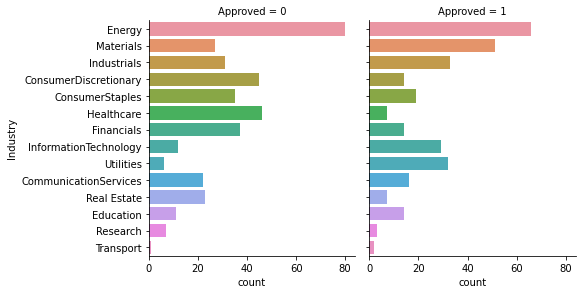

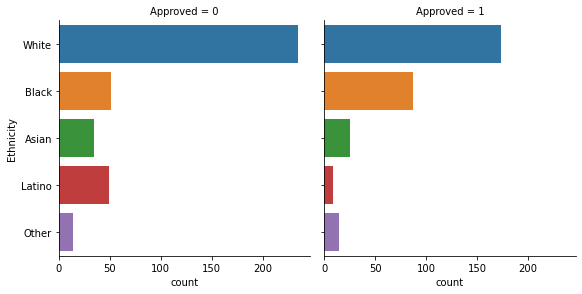

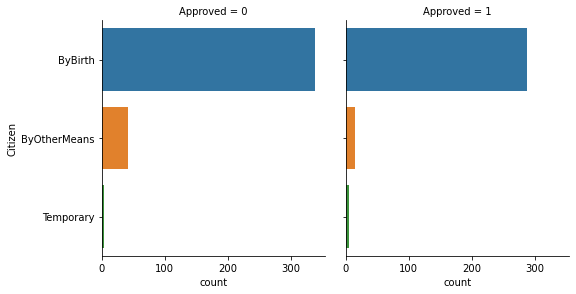

In [71]:
plt.figure(figsize=(8, 8))

for i, plot in enumerate(string_cols):
    sns.catplot(y=plot, col="Approved",
                data=df, kind="count",
                height=4, aspect=1,
                order=df[plot].value_counts().index)

# Key Findings

-Based on descriptive analysis, YearsEmployed, CreditScore, and Income might affect creidt card approval chance; the higher the numbers, the higher the chance of approval.

-PriorDefault and Employed also seem to be significant factors in determining approval status. Having prior default or defaults increases the chance of approval. Being employed also increases the chance of approval.


# Data Wrangling

In [72]:
df.head()


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [73]:

df_copy = df.drop(string_cols, axis=1)
df_copy.drop('ZipCode', axis=1, inplace=True)
print(string_cols)
df_copy.head()

['Industry', 'Ethnicity', 'Citizen']


,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,0,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,0,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,1,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,0,1


In [74]:
# splitting X (variables) and y (output)
X = df_copy.drop('Approved', axis=1)
y = df_copy['Approved']

In [75]:
# rescaling data
sc = MinMaxScaler(feature_range=(0,1))

X = sc.fit_transform(X)

# Machine Learning model

 we will evaluate different classification models to see which product the best accuracy score in this dataset.



In [77]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    scoring = f"{name}: {round(cv_results.mean(), 4)} ({round(cv_results.std(),4)})"
    print(scoring)

LR: 0.8449 (0.1936)
KNN: 0.8029 (0.1699)
DT: 0.7681 (0.1408)
NB: nan (nan)


C:\Users\Jyotirmoy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Jyotirmoy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    Parameters that will be passed to ``estimator.fit``.
  File "C:\Users\Jyotirmoy\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 242, in fit
    y = self._validate_data(y=y)
TypeError: _validate_data() missing 1 required positional argument: 'X'

  
C:\Users\Jyotirmoy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Jyotirmoy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 

SVM: 0.8391 (0.1928)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

test_model = LogisticRegression()
test_model.fit(X_train, y_train)

predictions = test_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy score for Logistic Regression model: {accuracy}')

Accuracy score for Logistic Regression model: 0.8985507246376812


#  score for Logistic Regression model: 0.8449

#  score for KNeighbors Classifier model: 0.8029

#  score for DecisionTreeClassifier model: 0.7681

#  score for SVM  model: 0.8391






An accuracy score of 89.86% is very good.


# Conclusion

Our classification model has an accuracy of 84.50% . This model is fairly accurate in predicting whether to approve an applicant for a credit card or not.

In the banking industry, I think that this can be a good start in determining the reliability of an applicant for a credit card. However, in reality, there are different types and levels of credit card so each credit card would have a separate model to approve.